<font size="10">Zadanie 1</font>


**Cel**
Użyj zbioru danych "Heart Disease" z repozytorium UCI oraz drzew decyzyjnych z biblioteki scikit-learn do przewidywania obecności choroby serca. ​

http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data​

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Wczytanie danych
df = pd.read_csv('heart.csv')
# Pierwszy 5 recordów:
df.head()
# Każdy record nie zawiera null.
# ['trestbps', 'chol', 'thalach']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Każdy record nie zawiera null.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Budowanie modeli
y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
models = [tree.DecisionTreeClassifier(max_depth=depth) for depth in range(2, 17, 2)]

for model in models:
    model.fit(X_train, y_train)


In [7]:
# ocena  
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models]
for acc, depth in zip(accuracy, range(2, 17, 2)):
    print(f'Accuracy from depth {depth} equal {acc:2f}')


Accuracy from depth 2 equal 0.756494
Accuracy from depth 4 equal 0.850649
Accuracy from depth 6 equal 0.922078
Accuracy from depth 8 equal 0.964286
Accuracy from depth 10 equal 0.970779
Accuracy from depth 12 equal 0.970779
Accuracy from depth 14 equal 0.970779
Accuracy from depth 16 equal 0.970779


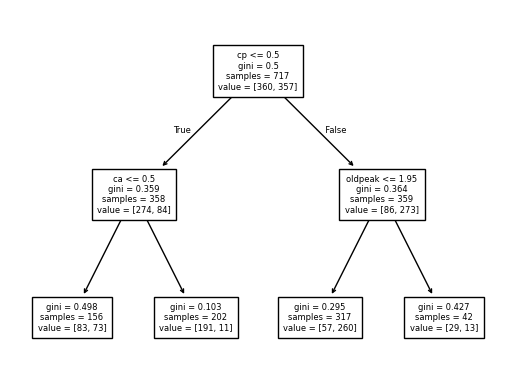

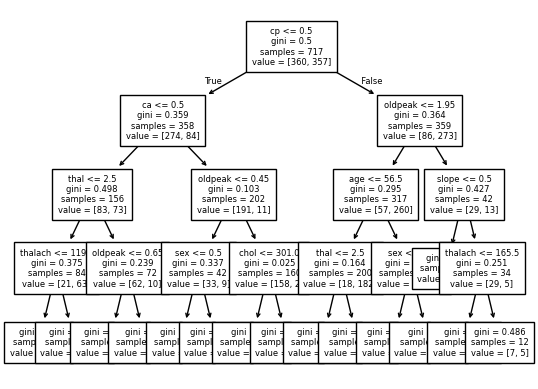

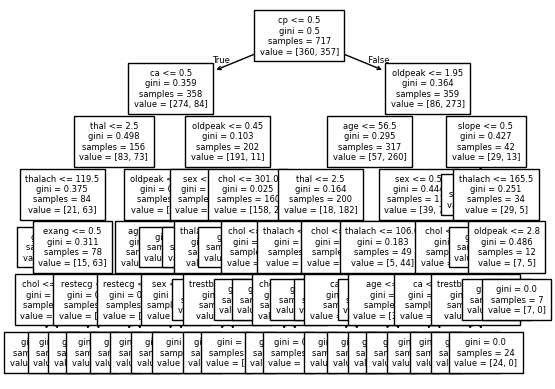

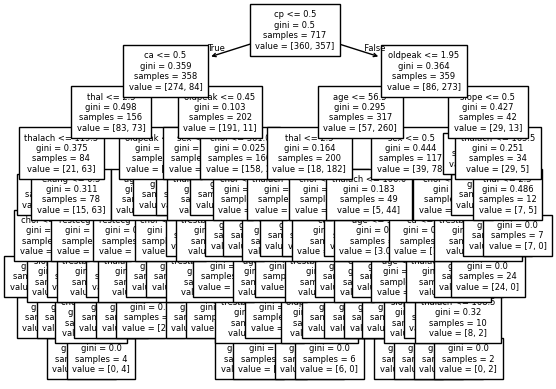

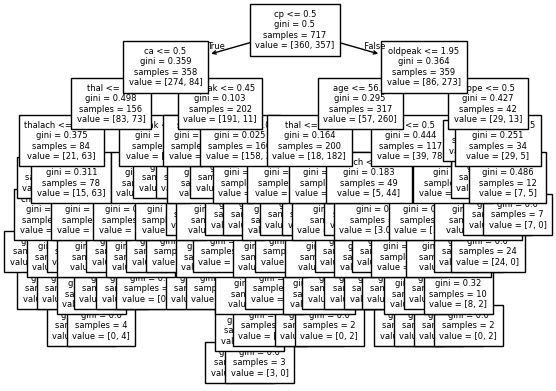

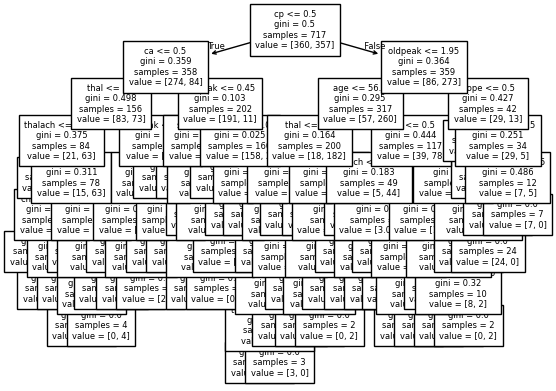

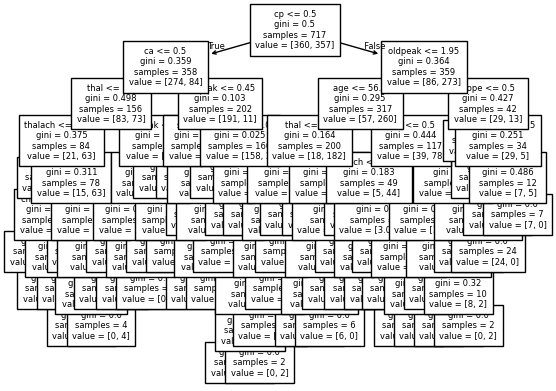

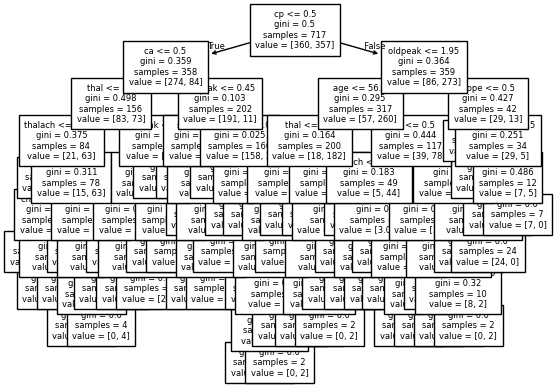

In [8]:
# wizualizacja
for model, depth in zip(models, range(2, 17, 2)):
    plt.title(f'Tree from {depth}')
    tree.plot_tree(model, fontsize=6, feature_names=list(X))
    plt.show()


<h1>Scaler</h1>

In [9]:
scaler = StandardScaler()
scaler.fit(df[['trestbps', 'chol', 'thalach']])
df_s = pd.DataFrame(scaler.transform(df[['trestbps', 'chol', 'thalach']]), columns=['trestbps', 'chol', 'thalach'])
df['trestbps'] = df_s['trestbps']
df['chol'] = df_s['chol']
df['thalach'] = df_s['thalach']
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
models = [tree.DecisionTreeClassifier(max_depth=depth) for depth in range(2, 17, 2)]

for model in models:
    model.fit(X_train, y_train)

accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models]
for acc, depth in zip(accuracy, range(2, 17, 2)):
    print(f'Accuracy from depth {depth} equal {acc:2f}')

# for model, depth in zip(models, range(2, 17, 2)):
#     plt.title(f'Tree from {depth}')
#     tree.plot_tree(model, fontsize=6, feature_names=list(X))
#     plt.show()


Accuracy from depth 2 equal 0.727273
Accuracy from depth 4 equal 0.831169
Accuracy from depth 6 equal 0.918831
Accuracy from depth 8 equal 0.967532
Accuracy from depth 10 equal 0.967532
Accuracy from depth 12 equal 0.967532
Accuracy from depth 14 equal 0.967532
Accuracy from depth 16 equal 0.967532


 1. Za każdym razem, gdy zwiększa się maksymalna głębokość drzewa decyzyjnego, wzrasta dokładność modelu (accuracy) na zestawie testowym, ale pojawia się zagrożenie przeuczenia (overfittingu), czyli model traci zdolność ogólnego prognozowania.
2. Skalowanie nie bardzo wpływa na wyniki, ponieważ nie istnieją czynniki z wartościami, które mocno wyróżniają się od wartości innych czynników.

<font size="10">Zadanie 2</font>


**Cel**
Zbudowanie modelu drzewa decyzyjnego, który klasyfikuje klientów banku na tych o wysokim ryzyku niewypłacalności i niskim ryzyku 
na podstawie ich cech finansowych i demograficznych. Model ten może pomóc bankom w podejmowaniu decyzji dotyczących udzielania kredytów.

1. ​Przygotowanie i wstępna analiza danych.
2. Budowanie modelu drzewa decyzyjnego do klasyfikacji ryzyka.
3. Walidacja modelu i analiza jego skuteczności.
4. Wizualizacja drzewa decyzyjnego.

Zestaw danych, który możemy wykorzystać do tego zadania, to "German Credit Data", który jest dostępny publicznie
i powszechnie używany do problemów związanych z ryzykiem kredytowym. Dane te są dostępne na platformie UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)





Zestaw danych zawiera 1000 wpisów o 20 zmiennych. Zmienne te obejmują zarówno cechy ilościowe, jak i jakościowe, takie jak:

- Status konta bankowego,
- Okres kredytu,
- Historia kredytowa,
- Cel kredytu,
- Wysokość kredytu,
- Stan cywilny i płeć,
- Wiek,
- Inne obciążenia finansowe,
- itp.


Klienci są klasyfikowani jako "dobre" lub "złe" ryzyko kredytowe.

# Przygotowanie i wstępna analiza danych.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('german_credit_data.csv')
df.head()
df.isnull().sum()
df.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


# Budowanie modelu drzewa decyzyjnego do klasyfikacji ryzyka.

In [12]:
y = df['kredit']
X = df.drop('kredit', axis=1)
max_depth = range(2, 6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
models = [tree.DecisionTreeClassifier(max_depth=depth) for depth in max_depth]

for model in models:
    model.fit(X_train, y_train)

# Walidacja modelu i analiza jego skuteczności.

In [13]:
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models]
for acc, depth in zip(accuracy, max_depth):
    print(f'Accuracy from depth {depth} equal {acc:2f}')

Accuracy from depth 2 equal 0.710000
Accuracy from depth 3 equal 0.703333
Accuracy from depth 4 equal 0.703333
Accuracy from depth 5 equal 0.713333


# Wizualizacja drzewa decyzyjnego.

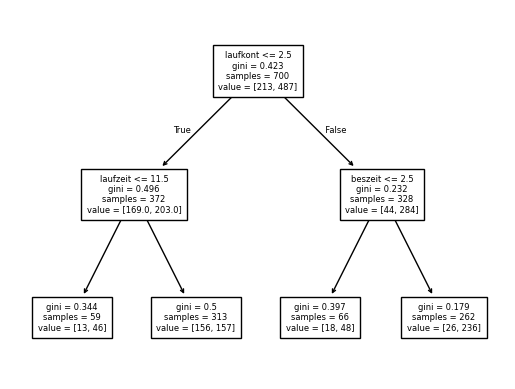

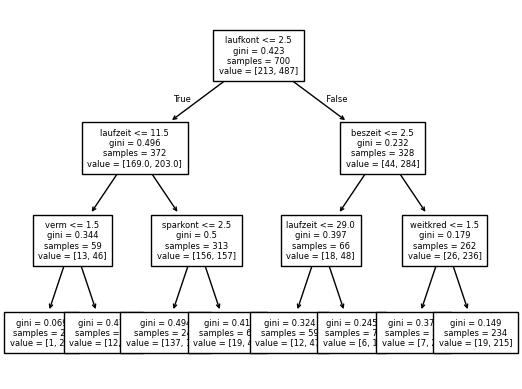

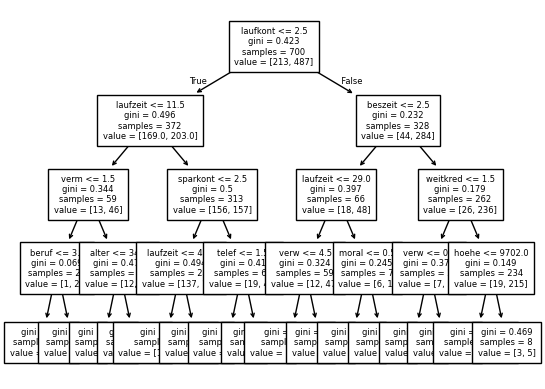

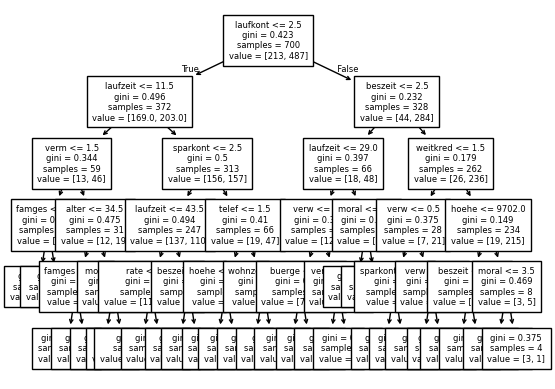

In [14]:
for model, depth in zip(models, max_depth):
    plt.title(f'Tree from {depth}')
    tree.plot_tree(model, fontsize=6, feature_names=list(X))
    plt.show()

<font size="5">Pytania</font>


1. Jakie dane wpływają na status ryzyka kredytowego?
2. Jaka jest najlepsza głębokość modelu?

# Odpowiedzi
1. Największy wpływ mają czynniki "laufkont, laufzeit, beszeit", ponieważ znajdują się na wyższych poziomach drzew decyzyjnych.
2. Najlepsza głębokość modelu to 4, ponieważ jest najbliższa 1.

<font size="10">Zadanie 3</font>

Proszę zrobić jeszcze raz zadanie 1 tym razem na lasach losowych.



Accuracy from depth 2 equal 0.686667
Accuracy from depth 4 equal 0.730000
Accuracy from depth 6 equal 0.766667
Accuracy from depth 8 equal 0.786667
Accuracy from depth 10 equal 0.796667
Accuracy from depth 12 equal 0.786667
Accuracy from depth 14 equal 0.793333
Accuracy from depth 16 equal 0.780000


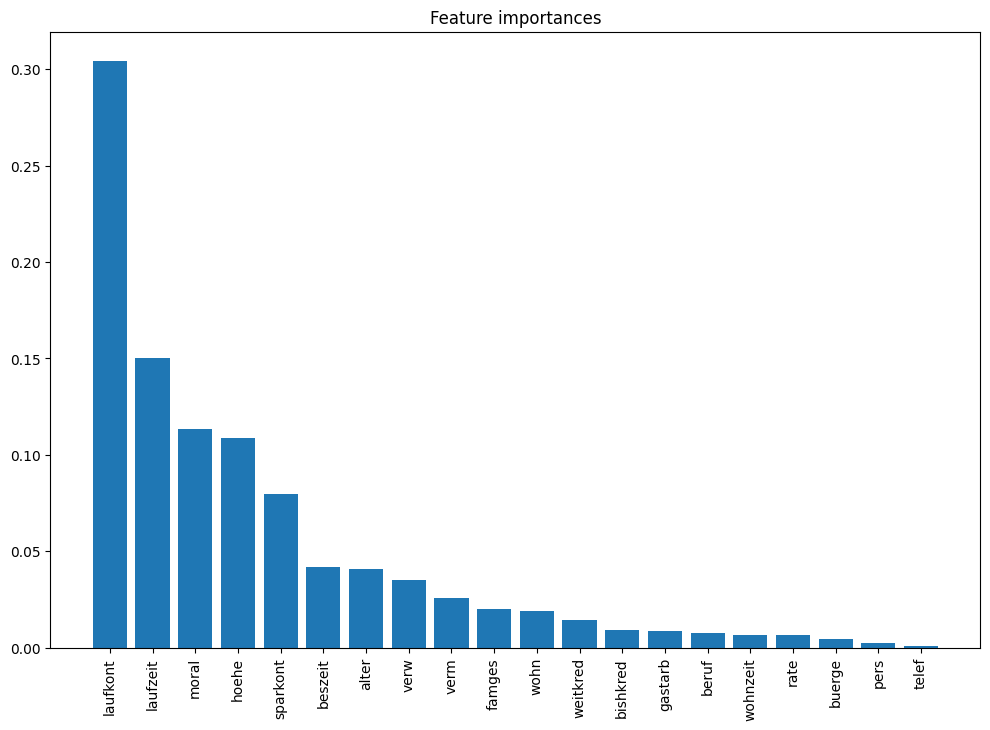

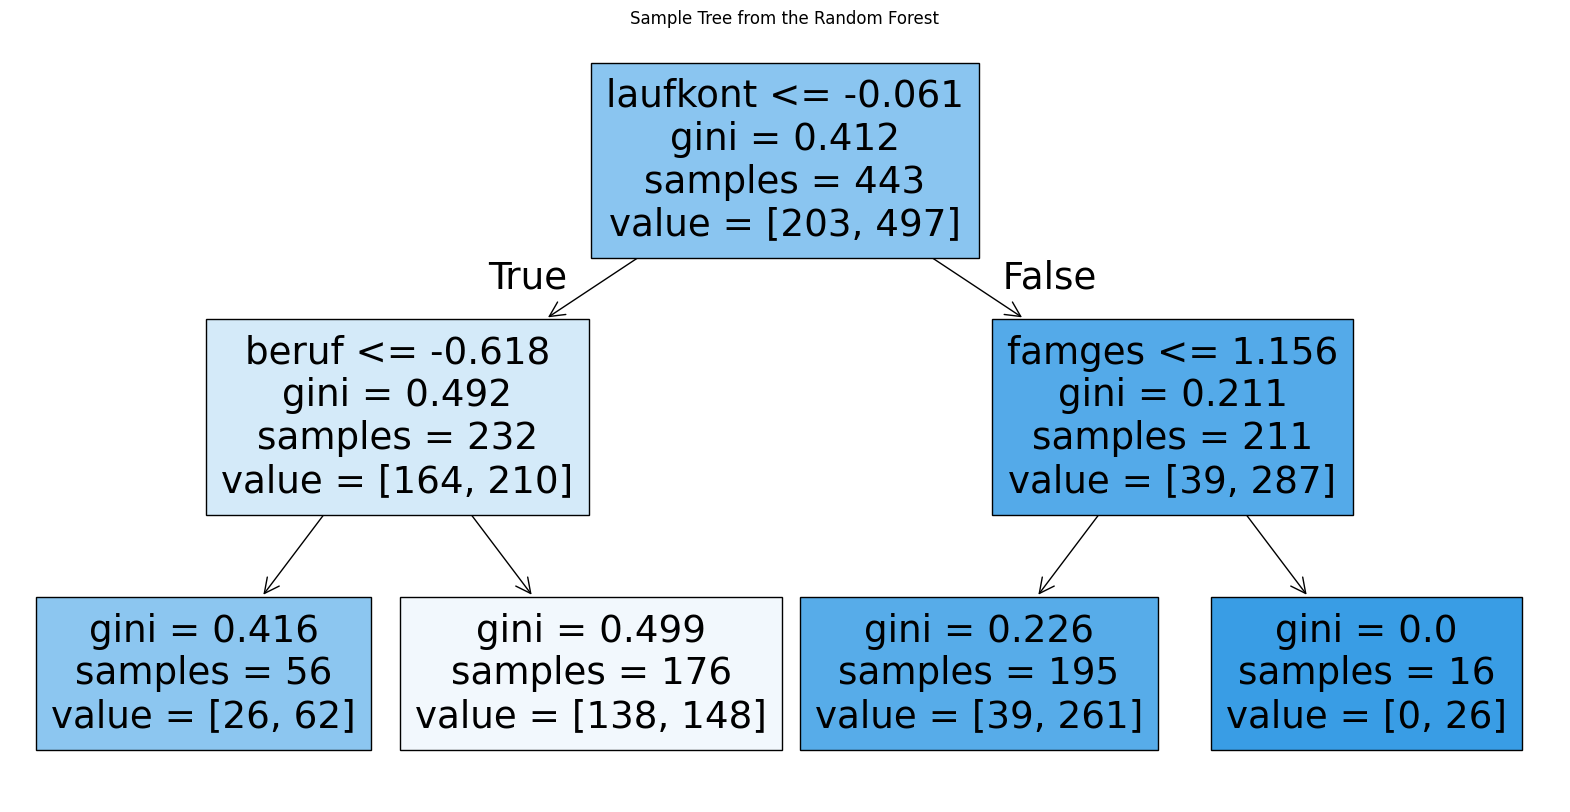

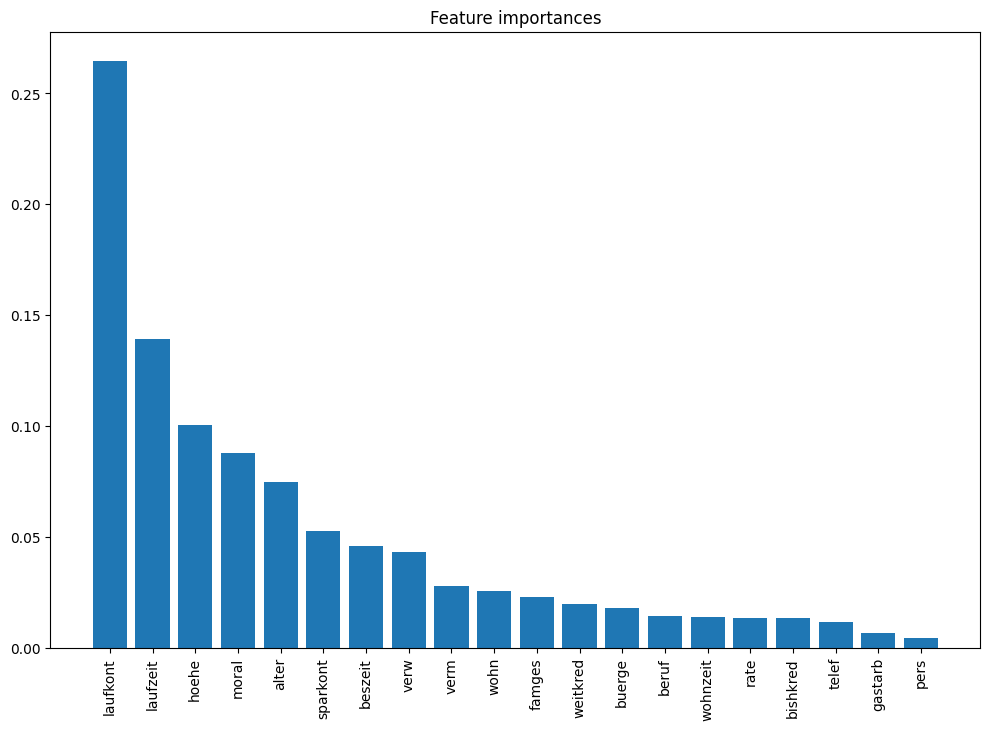

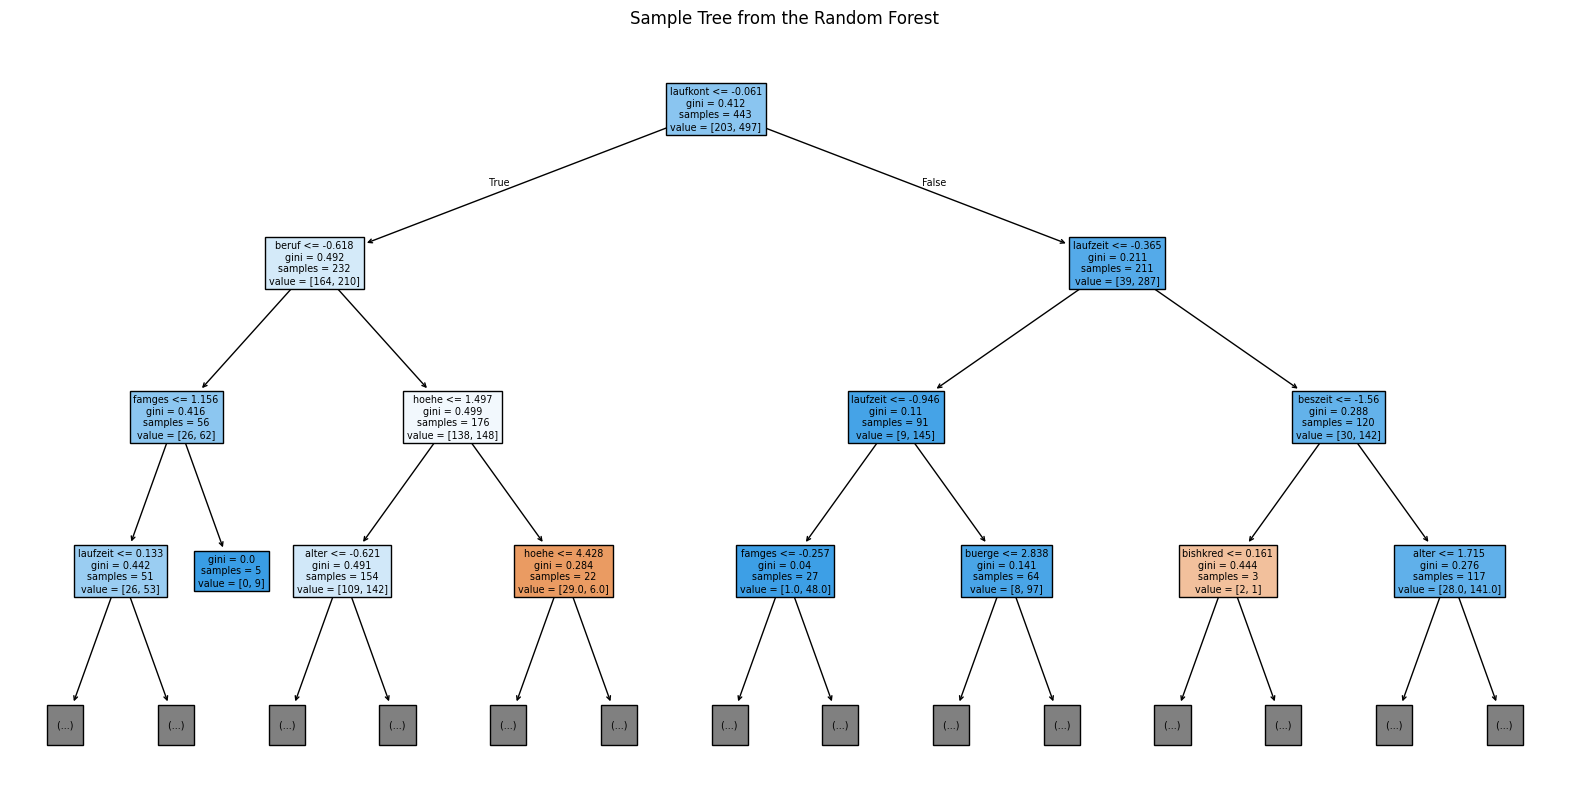

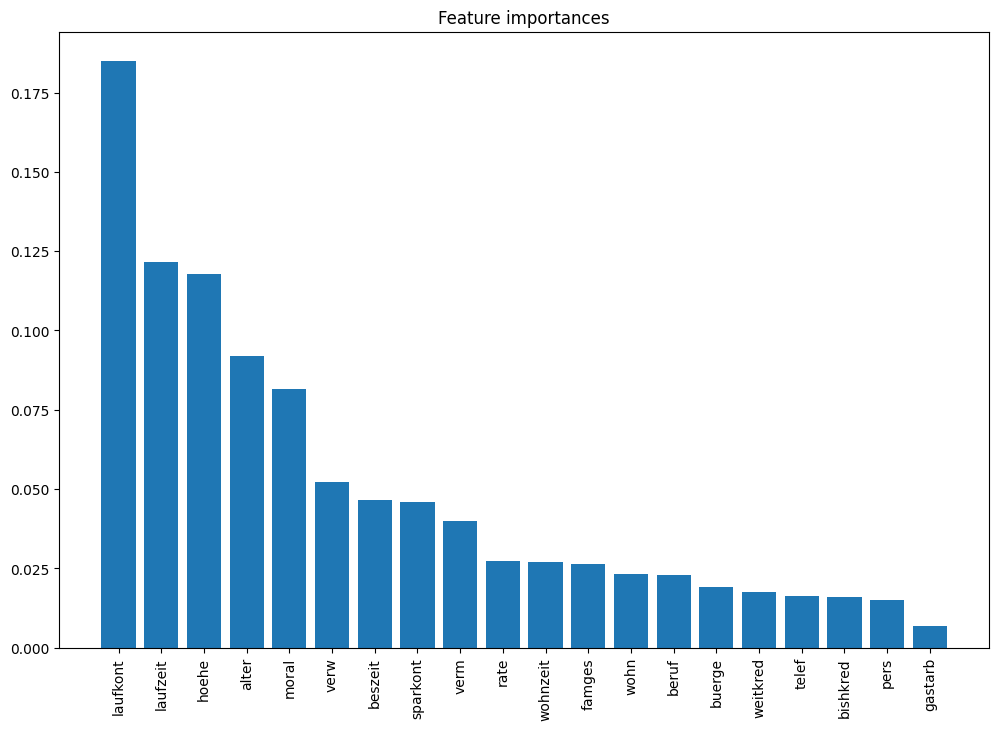

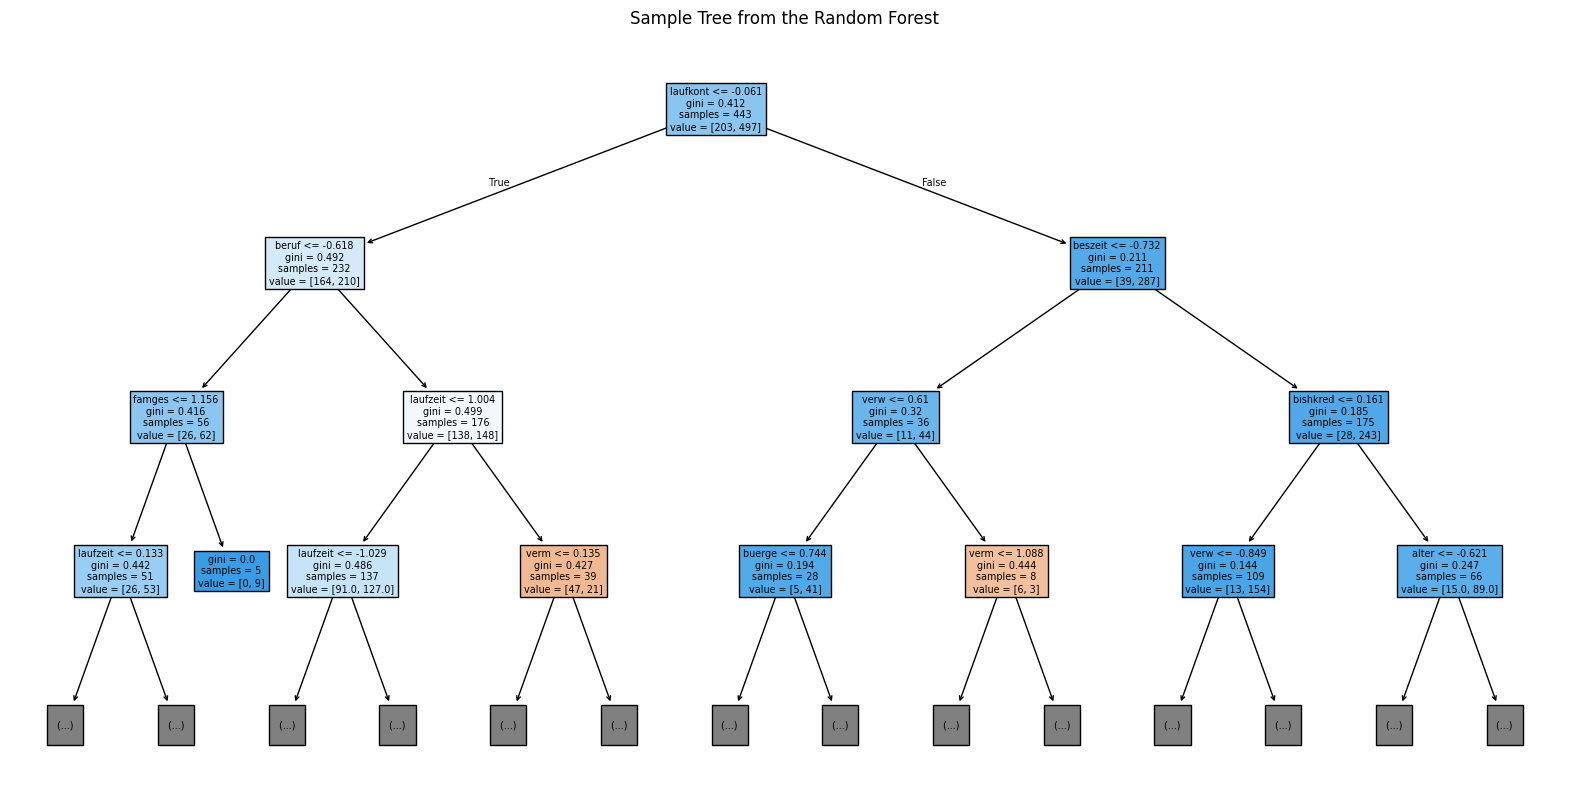

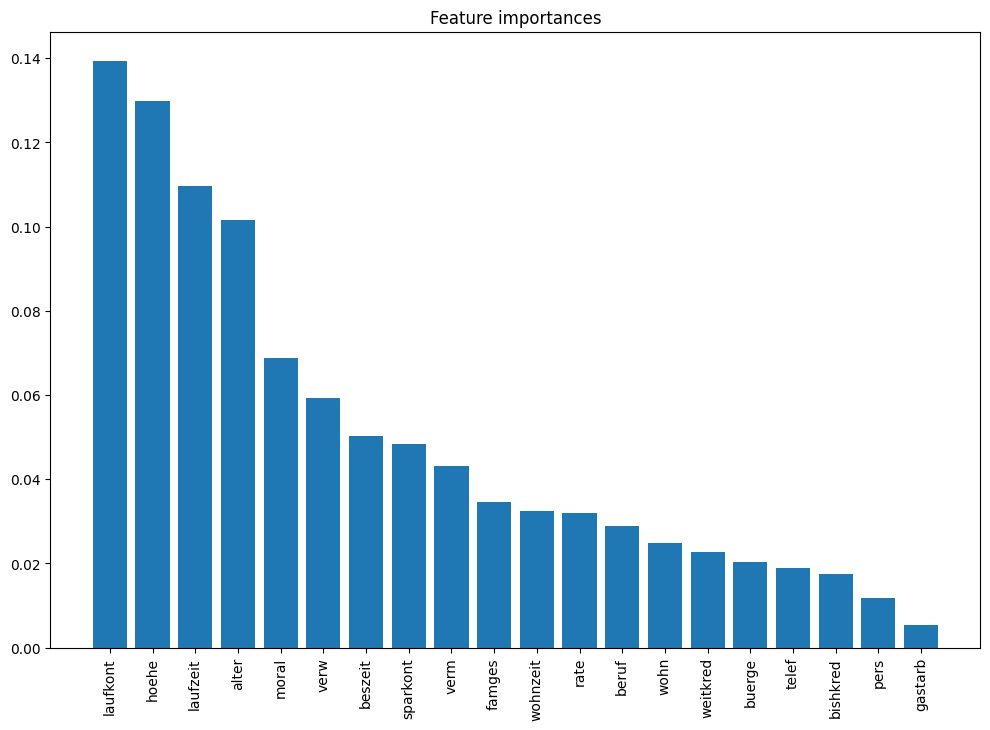

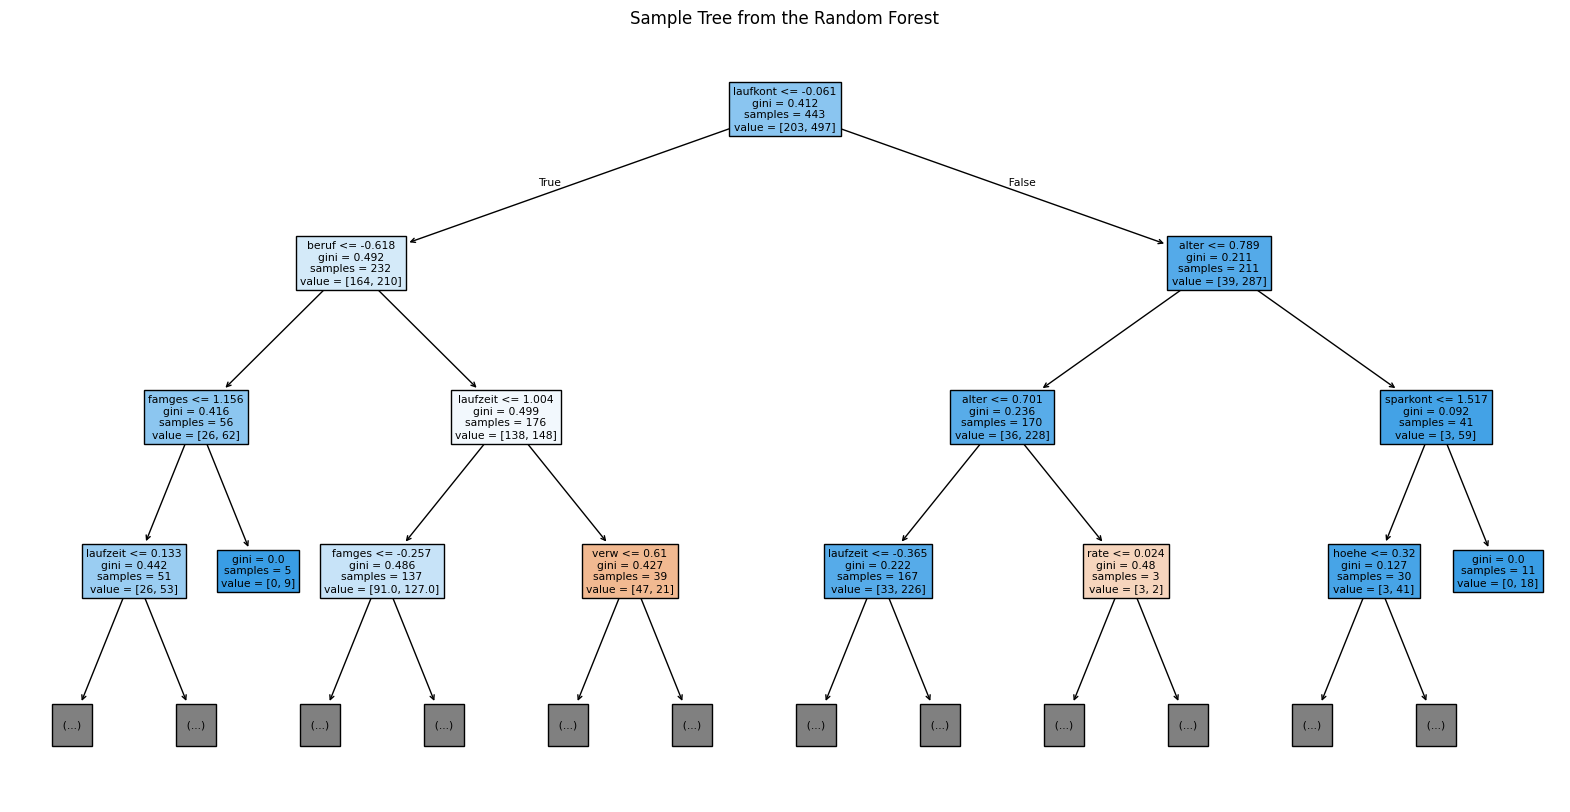

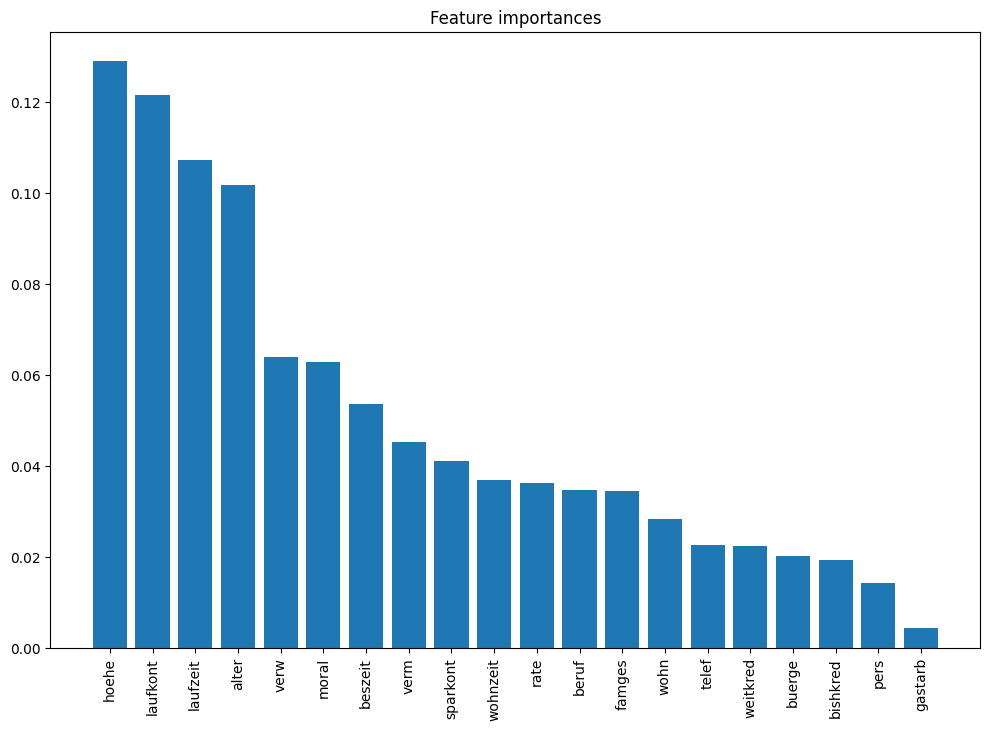

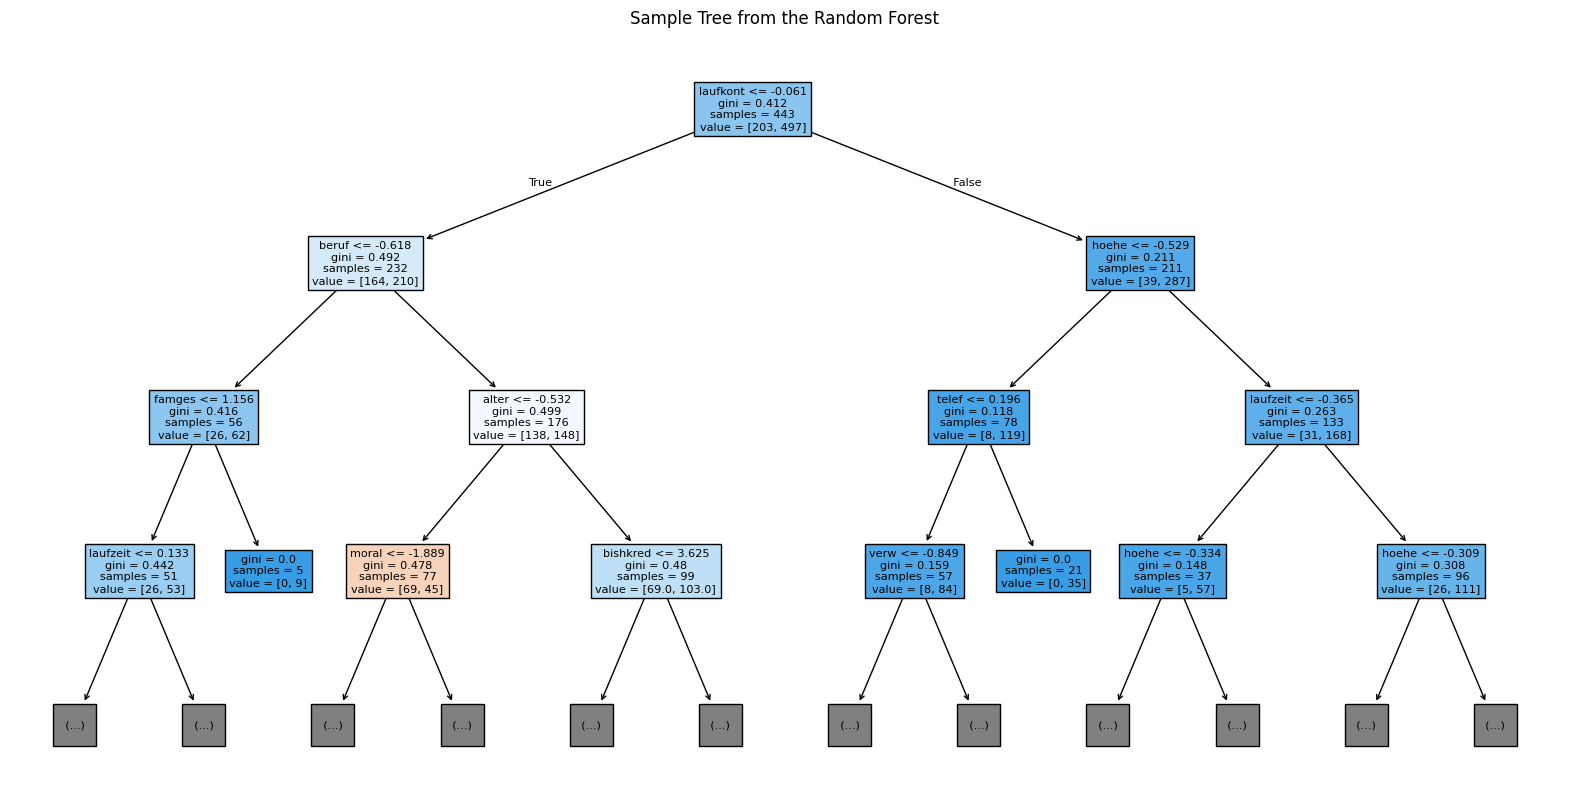

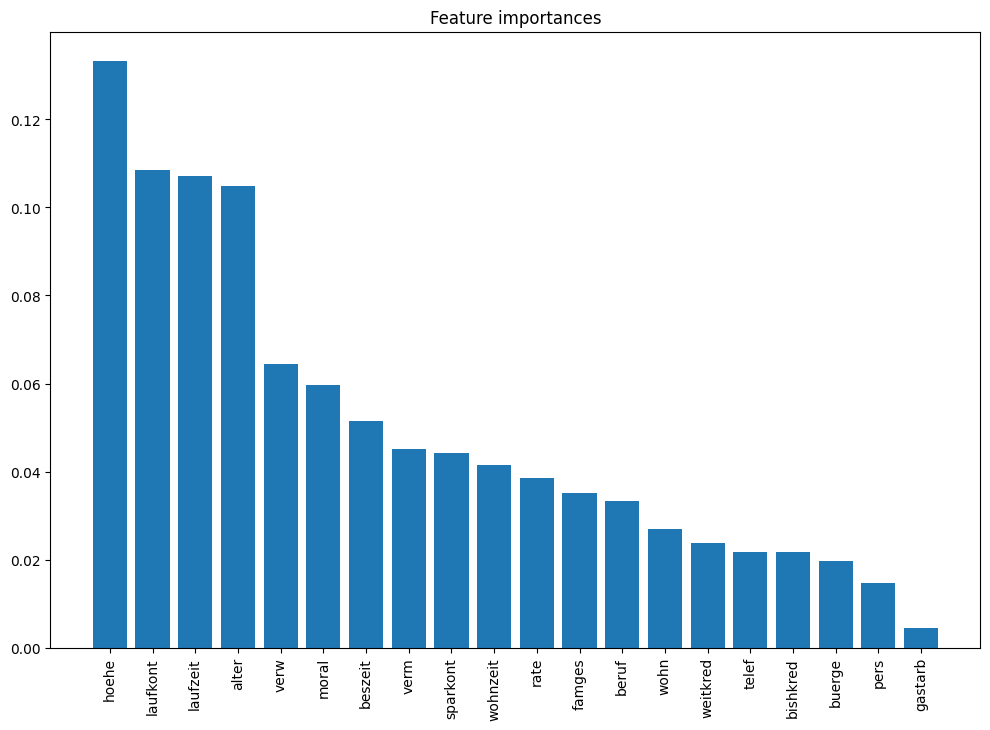

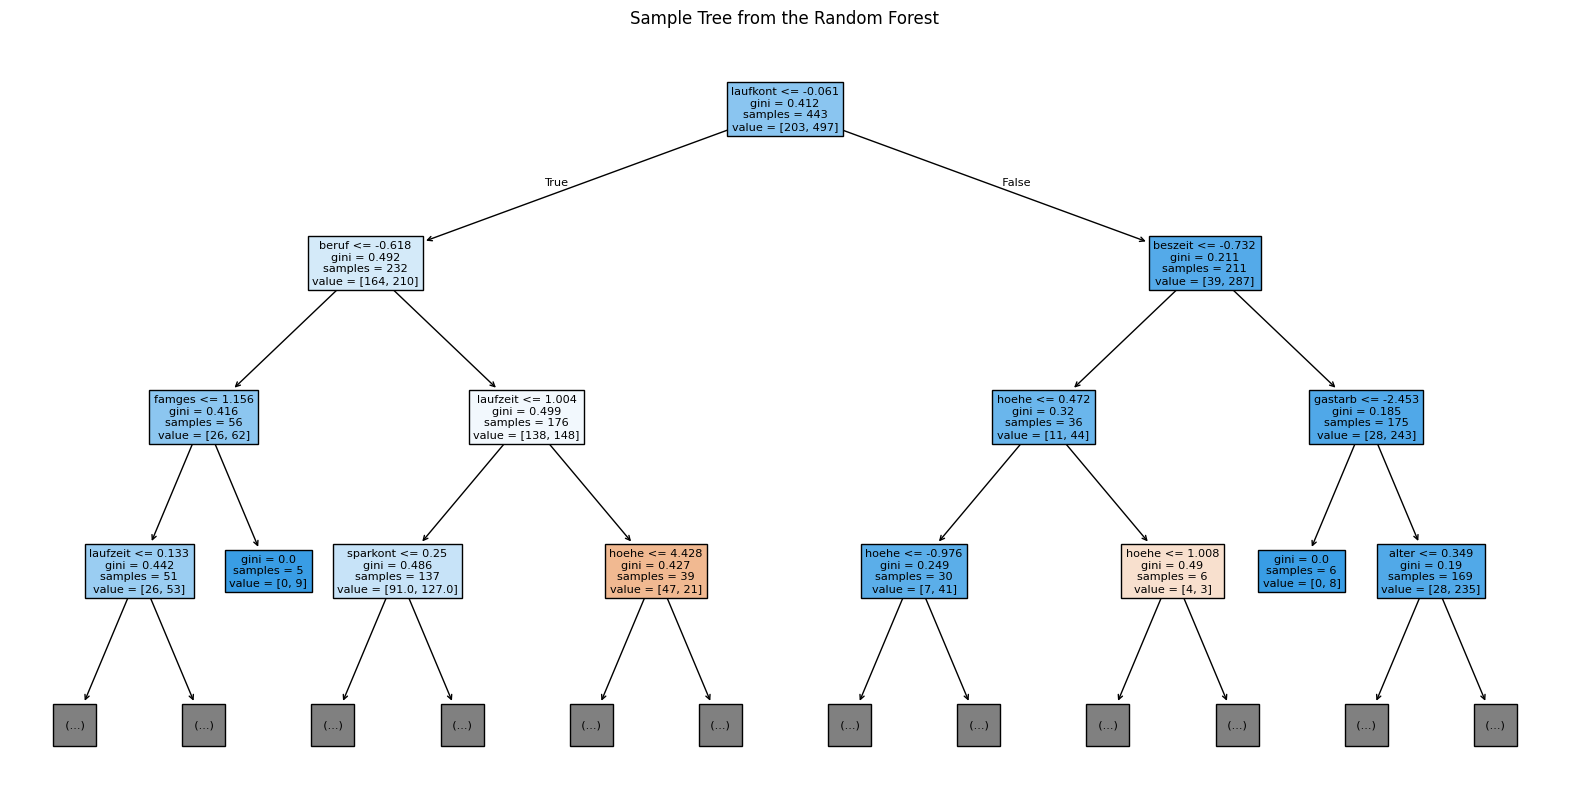

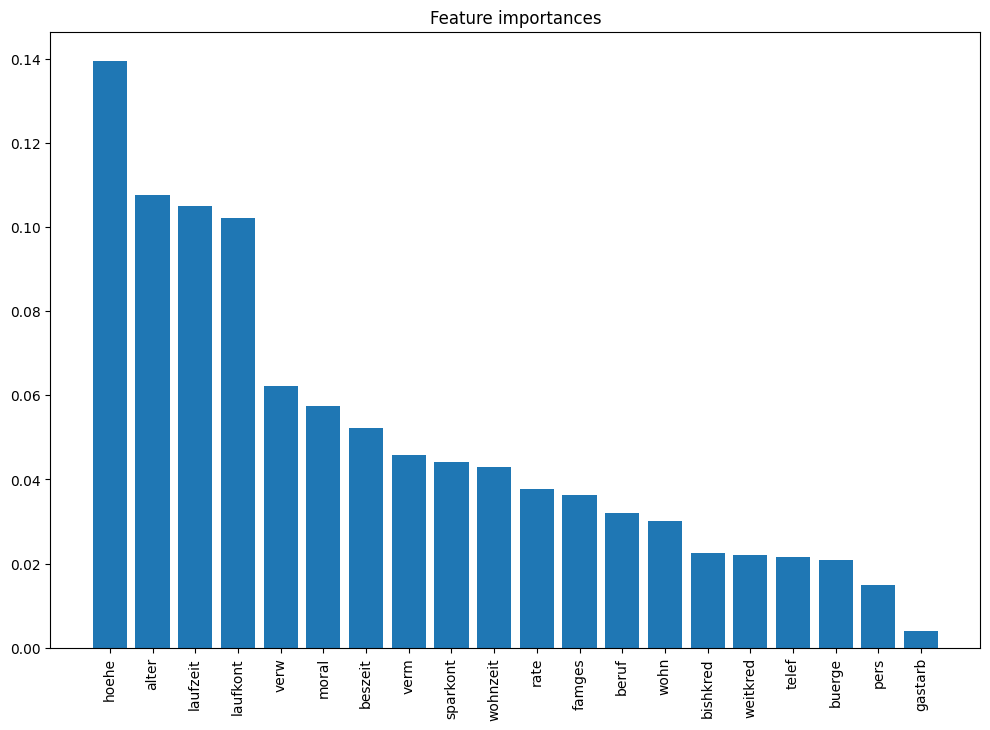

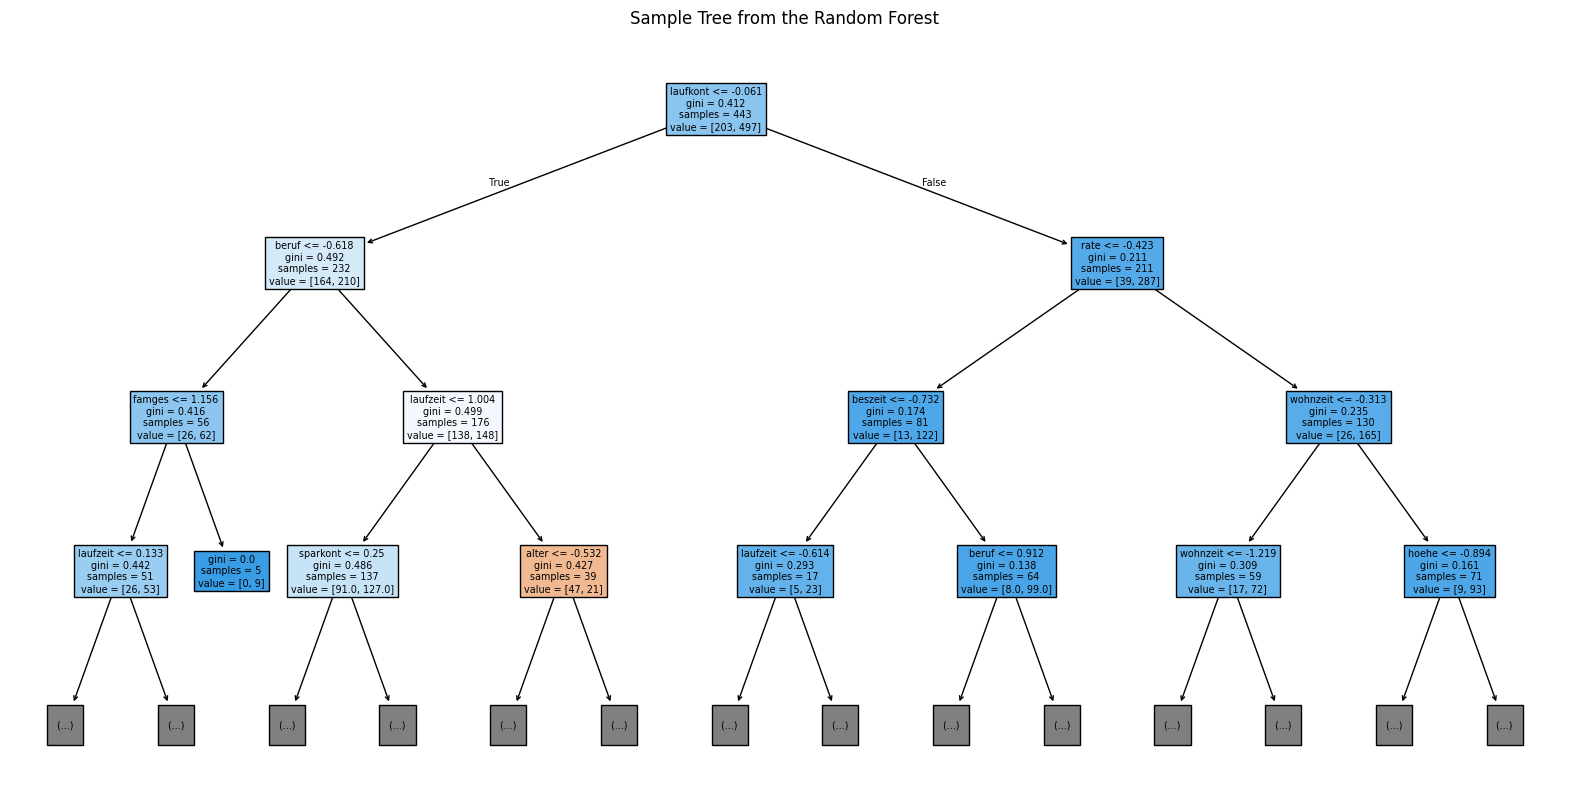

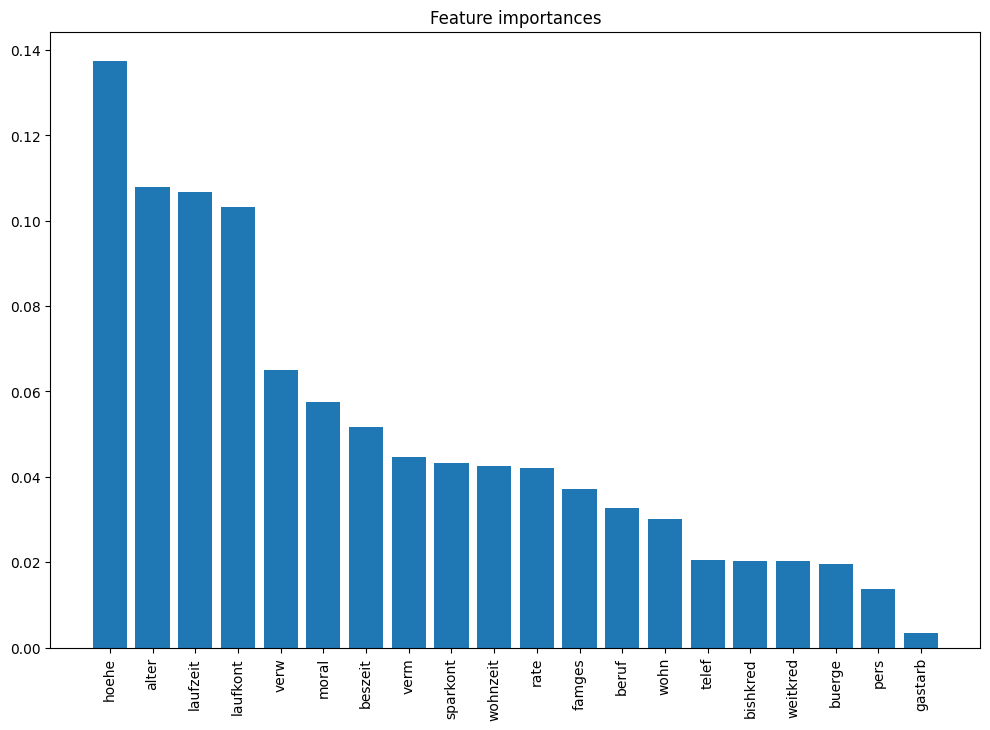

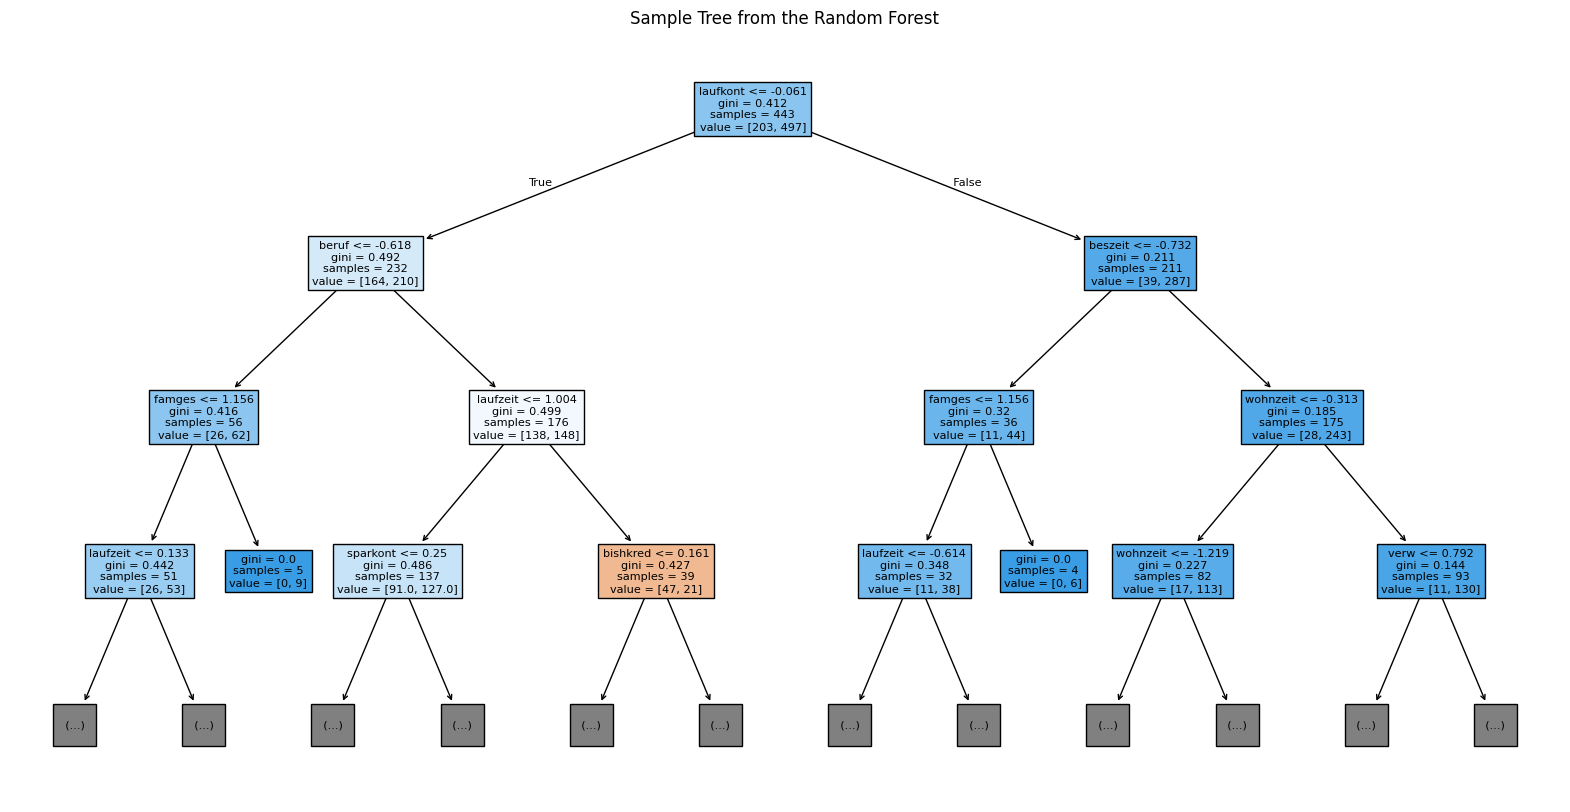

In [15]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('german_credit_data.csv')
df.head()
df.isnull().sum()
df.describe()

max_depth = range(2, 17, 2)
scaler = StandardScaler()
scaler.fit(df.drop('kredit', axis=1))
y = df['kredit']
X_train, X_test, y_train, y_test = train_test_split(scaler.transform(df.drop('kredit', axis=1)), y, test_size=0.3)
models = [RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42) for depth in max_depth]
for model in models:
    model.fit(X_train, y_train)
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models]
for acc, depth in zip(accuracy, max_depth):
    print(f'Accuracy from depth {depth} equal {acc:2f}')
    

# Ważność cech
for forest_model in models:
    feature_importances = forest_model.feature_importances_
    features = X.columns
    indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
    
    plt.figure(figsize=(12, 8))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
    plt.show()
    
    from sklearn.tree import plot_tree
    
    
    plt.figure(figsize=(20,10))
    plot_tree(forest_model.estimators_[0], filled=True, feature_names=features, max_depth=3)
    plt.title("Sample Tree from the Random Forest")
    plt.show()
    
    
    
